
# **Predict Restaurant Menu Items Profitability**

[!Restaurant Menu Items Profitability](./Designer.png)

## **Background:**
In the highly competitive restaurant industry, understanding the profitability of menu items is crucial for maintaining a successful business. Profitability can be influenced by various factors such as the ingredients used, the price of the item, the restaurant category, and customer preferences. Efficiently predicting which menu items are likely to be more profitable can help restaurant managers make informed decisions about menu design, pricing strategies, and inventory management.

## **Objective:**
The objective of this project is to develop a predictive model that can classify the profitability of restaurant menu items into categories such as **Low, Medium, and High**. This model will leverage historical data on menu items, including their prices, ingredients, and other relevant attributes, to make accurate profitability predictions.

## **Data:**
The dataset consists of 1000 entries, each representing a menu item from various restaurants. The features of the dataset are as follows:
- **RestaurantID**: Unique identifier for the restaurant.
- **MenuCategory**: Category of the menu item (e.g., Appetizers, Main Course, Desserts).
- **MenuItem**: Name of the menu item.
- **Ingredients**: List of ingredients used in the menu item.
- **Price**: Price of the menu item.
- **Profitability**: Profitability category of the menu item (Low, Medium, High).

## **Tasks:**

### **1. Data Exploration and Preprocessing:**
- Conduct exploratory data analysis (EDA) to understand the distribution and relationships within the data.
- Handle missing values, if any, and encode categorical features appropriately.
- Engineer new features that may help in improving the model's performance, such as the number of ingredients used or specific ingredient indicators.

### **2. Model Development:**
- Develop several machine learning models (e.g., RandomForestClassifier, DecisionTreeClassifier, XGBClassifier) to predict the profitability of menu items.
- Perform hyperparameter tuning using GridSearchCV to find the best parameters for each model.

### **3. Model Evaluation:**
- Evaluate the performance of each model using metrics such as accuracy and F1 score.
- Compare the models and select the best-performing one based on the evaluation metrics.

### **4. Deep Learning Model:**
- Develop a Deep Neural Network (DNN) model with multiple layers to predict profitability.
- Train and evaluate the DNN model, and compare its performance with traditional machine learning models.

### **5. Model Saving and Deployment:**
- Save the best models (with accuracy greater than 80%) in the `models` directory for future use.
- Document the model training and evaluation process, and provide recommendations for deploying the model in a production environment.

## **Expected Outcome:**
By the end of this project, we aim to have a robust predictive model that accurately classifies the profitability of restaurant menu items. This model can be used by restaurant managers to optimize their menus, set competitive prices, and ultimately enhance their profitability.

## **Impact:**
The implementation of this predictive model will enable restaurants to make data-driven decisions, leading to improved financial performance and customer satisfaction. By understanding which menu items are more profitable, restaurants can focus on promoting and improving these items, thereby maximizing their overall profitability.

## **Acknowledgements:**
We would like to extend our gratitude to the following resources and tools, which made this project possible:

- **[TensorFlow](https://www.tensorflow.org/)**: For providing a robust framework for developing and training deep learning models.
- **[Scikit-learn (sklearn)](https://scikit-learn.org/stable/)**: For offering comprehensive tools for data analysis, preprocessing, and machine learning.
- **[Keras](https://keras.io/)**: For its easy-to-use API that facilitated the creation and training of our deep neural network models.
- **[Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-menu-items-profitability)**: For providing the dataset that was crucial for training and evaluating our models.

Their contributions have been invaluable in achieving the objectives of this project.


## Importing Libraries

In [88]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

import pickle

## Load and EDA

In [89]:
dataset = pd.read_csv("./Data/restaurant_menu_optimization_data.csv")

In [90]:
dataset.shape

(1000, 6)

In [91]:
dataset.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [94]:
dataset.isnull().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

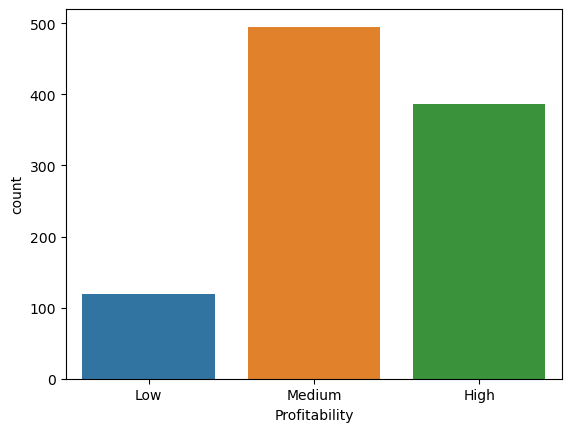

In [95]:
# Analyze the distribution of the target variable (Profitability).
sns.countplot(x='Profitability', data=dataset)
plt.show()

In [96]:
dataset['Profitability'].value_counts()

Profitability
Medium    495
High      386
Low       119
Name: count, dtype: int64

In [97]:
dataset['MenuCategory'].value_counts()

MenuCategory
Beverages      264
Desserts       256
Appetizers     254
Main Course    226
Name: count, dtype: int64

In [98]:
dataset['MenuItem'].value_counts()

MenuItem
Iced Tea                 72
New York Cheesecake      71
Tiramisu                 70
Soda                     69
Caprese Salad            67
Coffee                   66
Vegetable Stir-Fry       66
Spinach Artichoke Dip    64
Bruschetta               64
Fruit Tart               60
Stuffed Mushrooms        59
Lemonade                 57
Grilled Steak            55
Chocolate Lava Cake      55
Shrimp Scampi            55
Chicken Alfredo          50
Name: count, dtype: int64

The Value Counts for MenuCategory  :   
MenuCategory
Beverages      264
Desserts       256
Appetizers     254
Main Course    226
Name: count, dtype: int64

---------------------------------------------------------------------------


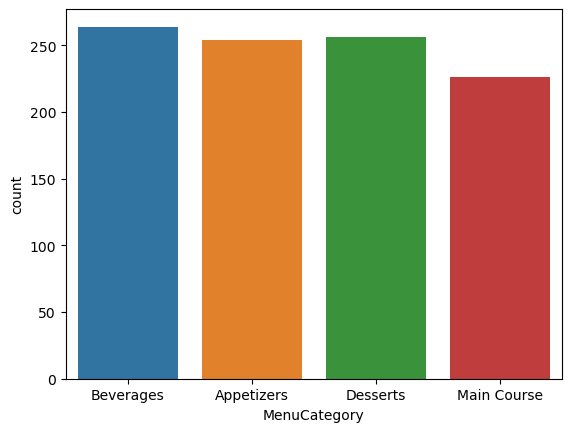

The Value Counts for MenuItem  :   
MenuItem
Iced Tea                 72
New York Cheesecake      71
Tiramisu                 70
Soda                     69
Caprese Salad            67
Coffee                   66
Vegetable Stir-Fry       66
Spinach Artichoke Dip    64
Bruschetta               64
Fruit Tart               60
Stuffed Mushrooms        59
Lemonade                 57
Grilled Steak            55
Chocolate Lava Cake      55
Shrimp Scampi            55
Chicken Alfredo          50
Name: count, dtype: int64

---------------------------------------------------------------------------


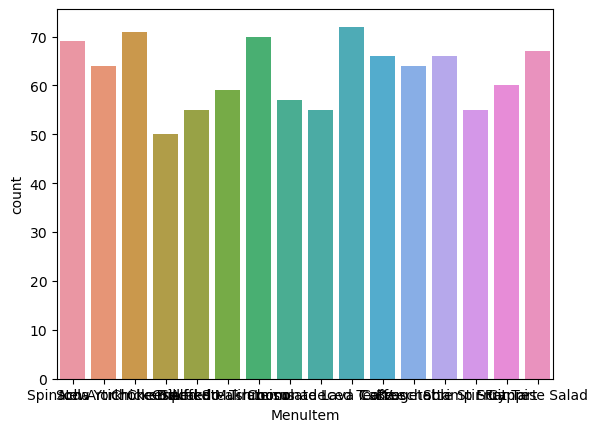

In [99]:
for col in ['MenuCategory', 'MenuItem']:
    print(f"The Value Counts for {col}  :   \n{dataset[col].value_counts(())}\n")
    print(f"-"*75)
    sns.countplot(x=col, data=dataset)
    plt.show()

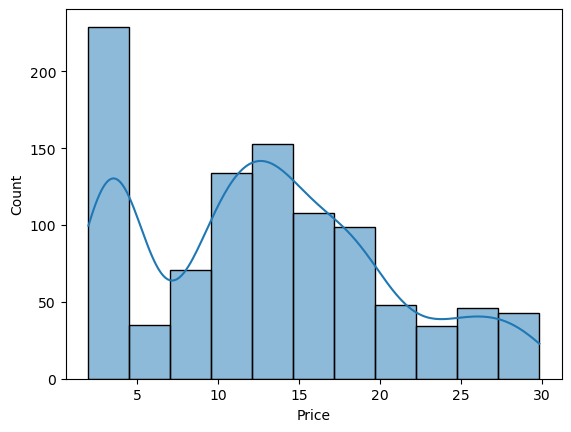

In [100]:
sns.histplot(dataset['Price'], kde=True)
plt.show()

In [101]:
cat_cols = [x for x in dataset.columns if dataset[x].dtypes == 'object']
cat_cols.remove('Profitability')

In [102]:
cat_cols

['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients']

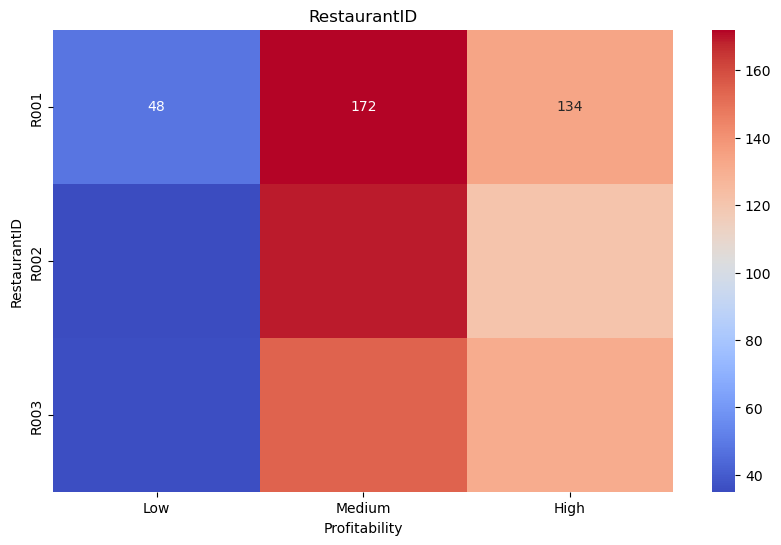

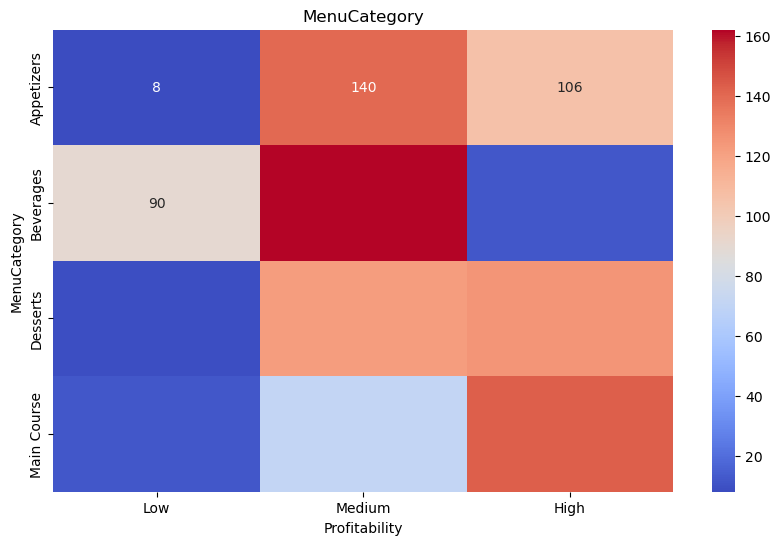

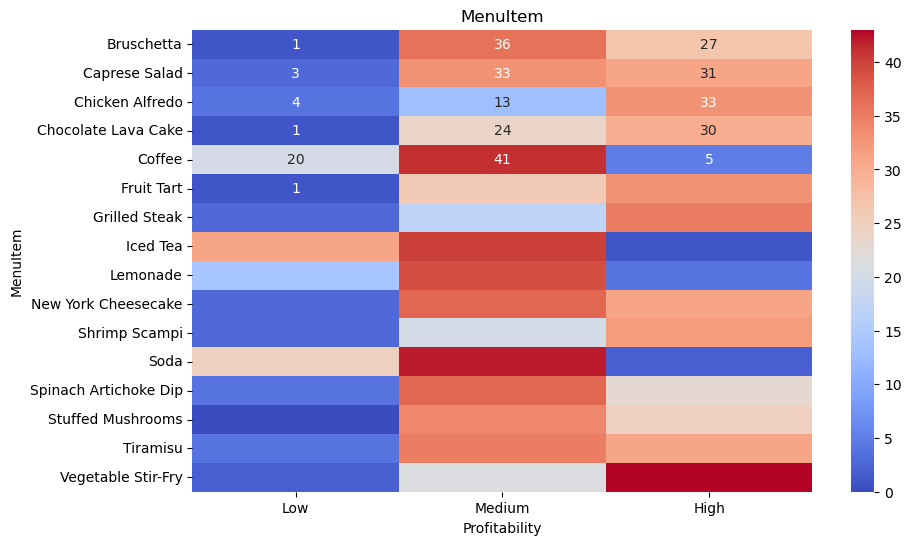

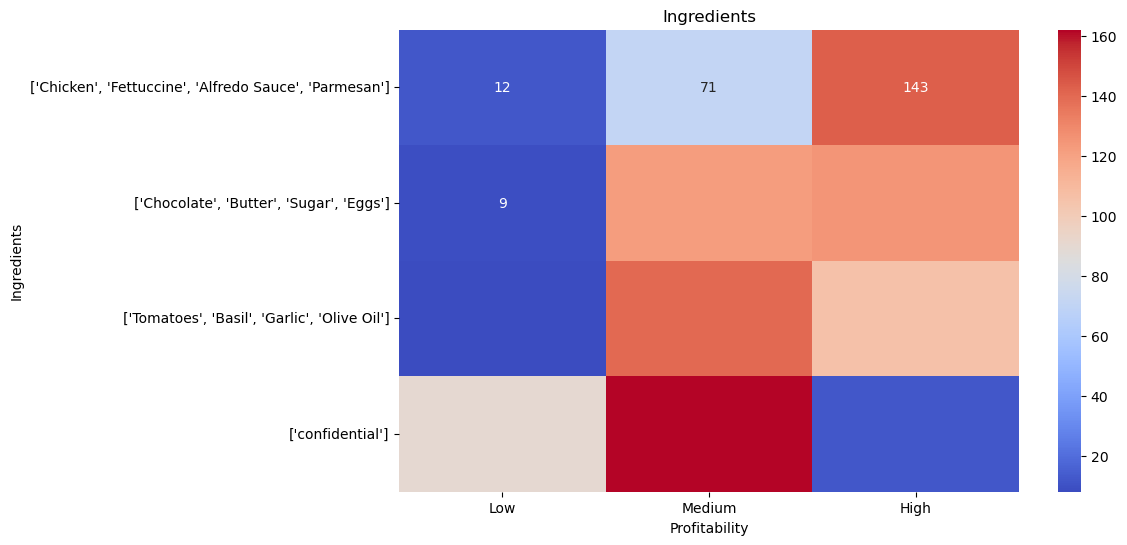

In [103]:
for col in cat_cols:
    contgnc_tbl = pd.crosstab(dataset[col], dataset['Profitability'])
    contgnc_tbl = contgnc_tbl.loc[:, ['Low', 'Medium', 'High']]
    plt.figure(figsize=(10, 6))
    plt.title(col)
    sns.heatmap(contgnc_tbl, annot=True, cmap='coolwarm', fmt='d')
    plt.show()

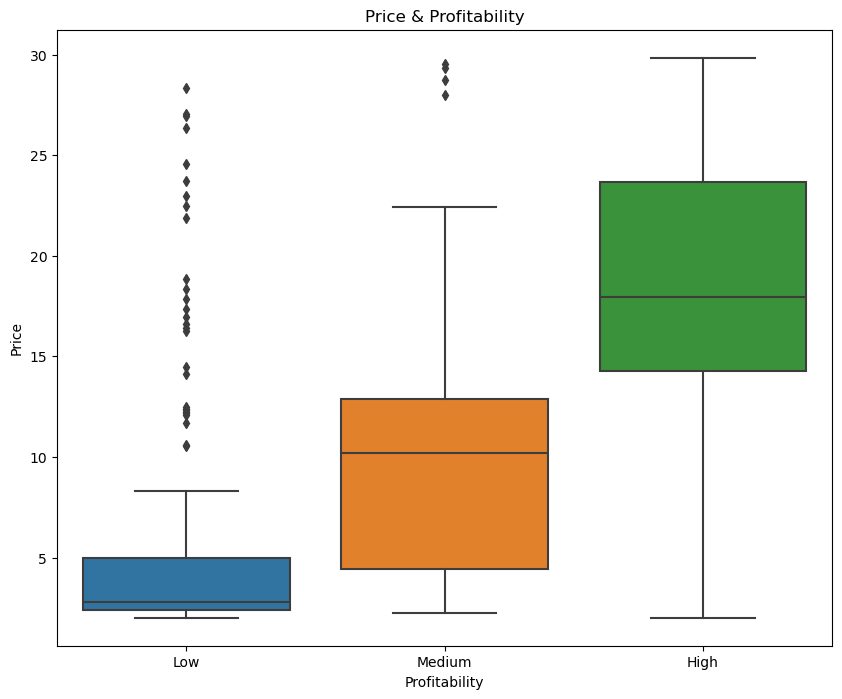

In [104]:
plt.figure(figsize=(10, 8))
plt.title("Price & Profitability")
sns.boxplot(data=dataset, x='Profitability', y='Price')
plt.show()

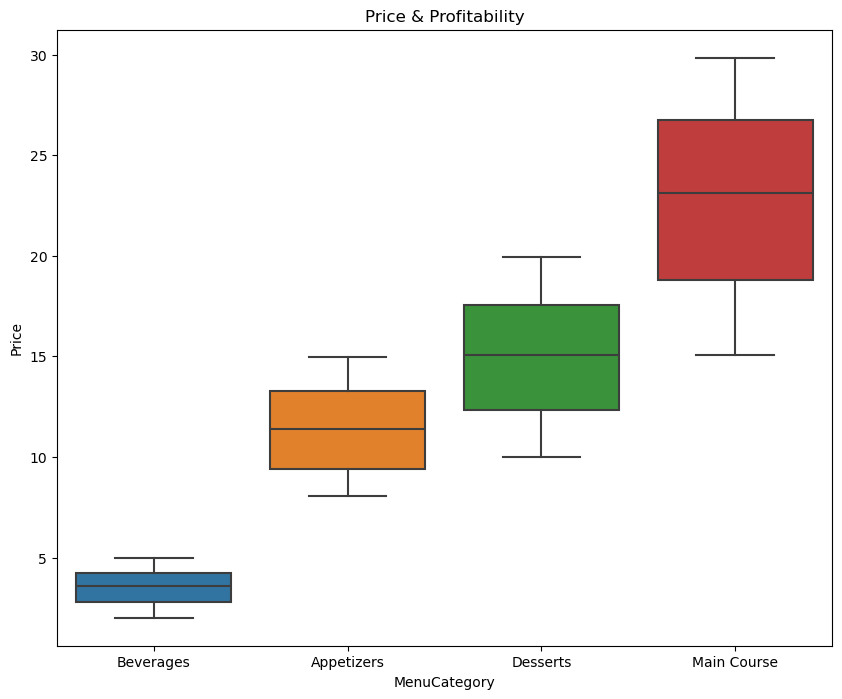

In [105]:
plt.figure(figsize=(10, 8))
plt.title("Price & Profitability")
sns.boxplot(data=dataset, x='MenuCategory', y='Price')
plt.show()

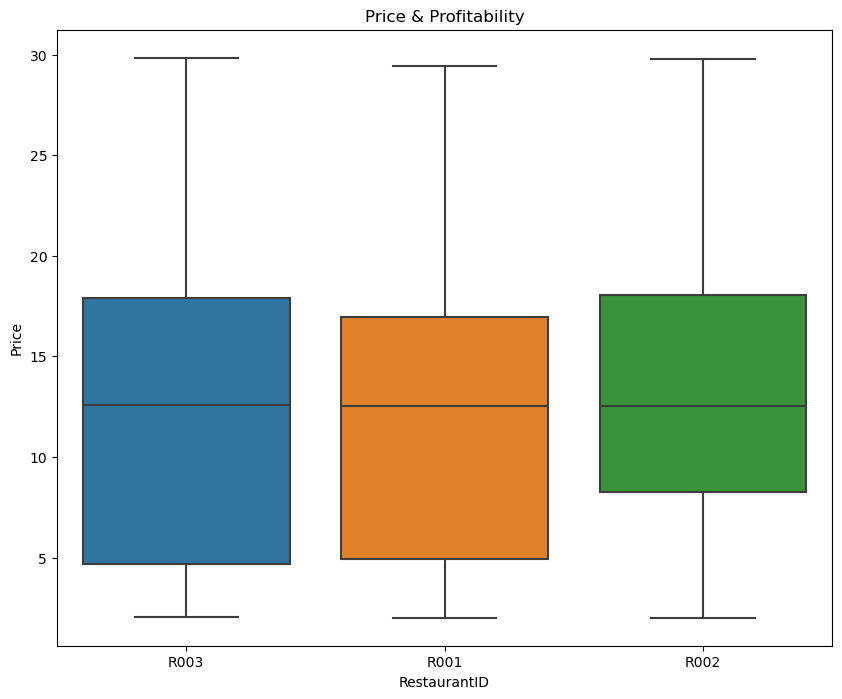

In [106]:
plt.figure(figsize=(10, 8))
plt.title("Price & Profitability")
sns.boxplot(data=dataset, x='RestaurantID', y='Price')
plt.show()

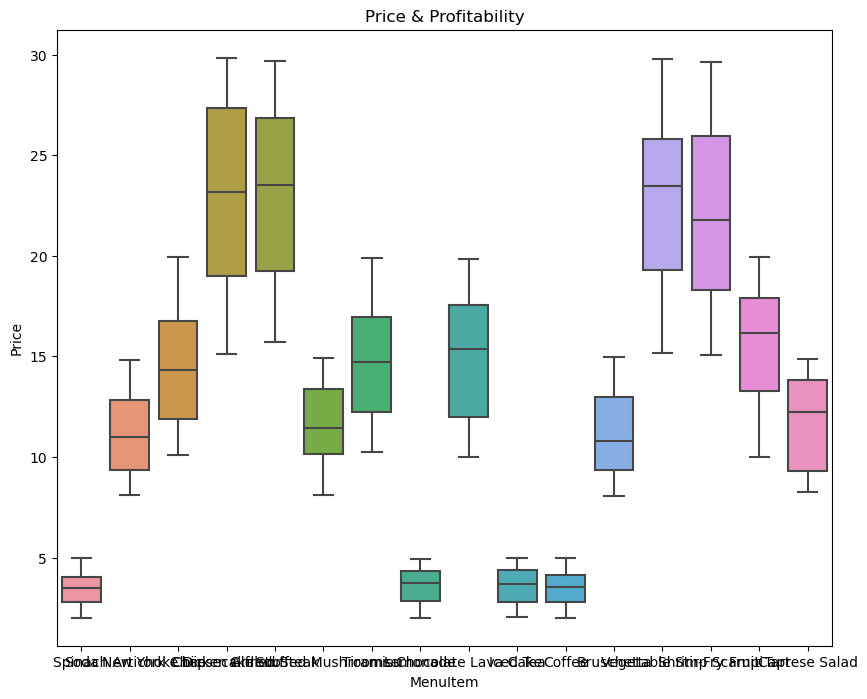

In [107]:
plt.figure(figsize=(10, 8))
plt.title("Price & Profitability")
sns.boxplot(data=dataset, x='MenuItem', y='Price')
plt.show()

In [108]:
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5*IQR

outliers = dataset[(dataset['Price'] < lower_bound) | (dataset['Price'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [RestaurantID, MenuCategory, MenuItem, Ingredients, Price, Profitability]
Index: []


## Feature Engineering

In [109]:
# Splitting number of Ingredients
dataset['NumIngredientsUsed'] = dataset['Ingredients'].apply(lambda x: len(x.split(',')))

dataset.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,NumIngredientsUsed
0,R003,Beverages,Soda,['confidential'],2.55,Low,1
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium,4
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High,4
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High,4
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium,4


In [110]:
# Encoding categorical cols
LE = LabelEncoder()

# Label Encoding for Target col
dataset['Profitability'] = LE.fit_transform(dataset['Profitability'])

# One-Hot Encoding for other cat cols
dataset = pd.get_dummies(dataset, columns=['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients'])


In [111]:
dataset.shape

(1000, 30)

In [112]:
dataset.head()

,Price,Profitability,NumIngredientsUsed,RestaurantID_R001,RestaurantID_R002,RestaurantID_R003,MenuCategory_Appetizers,MenuCategory_Beverages,MenuCategory_Desserts,MenuCategory_Main Course,...,MenuItem_Shrimp Scampi,MenuItem_Soda,MenuItem_Spinach Artichoke Dip,MenuItem_Stuffed Mushrooms,MenuItem_Tiramisu,MenuItem_Vegetable Stir-Fry,"Ingredients_['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']","Ingredients_['Chocolate', 'Butter', 'Sugar', 'Eggs']","Ingredients_['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",Ingredients_['confidential']
0,2.55,1,1,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,11.12,2,4,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,18.66,0,4,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,29.55,0,4,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,17.73,2,4,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [113]:
dataset.columns = [col.replace('[', '').replace(']', '').replace("'", '').replace(" ", "_") for col in dataset.columns]

dataset.head()

,Price,Profitability,NumIngredientsUsed,RestaurantID_R001,RestaurantID_R002,RestaurantID_R003,MenuCategory_Appetizers,MenuCategory_Beverages,MenuCategory_Desserts,MenuCategory_Main_Course,...,MenuItem_Shrimp_Scampi,MenuItem_Soda,MenuItem_Spinach_Artichoke_Dip,MenuItem_Stuffed_Mushrooms,MenuItem_Tiramisu,MenuItem_Vegetable_Stir-Fry,"Ingredients_Chicken,_Fettuccine,_Alfredo_Sauce,_Parmesan","Ingredients_Chocolate,_Butter,_Sugar,_Eggs","Ingredients_Tomatoes,_Basil,_Garlic,_Olive_Oil",Ingredients_confidential
0,2.55,1,1,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,11.12,2,4,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,18.66,0,4,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,29.55,0,4,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,17.73,2,4,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [114]:
bool_feat = []

for col in dataset.columns:
    if dataset[col].dtypes == 'bool':
         bool_feat.append(col)

bool_feat

['RestaurantID_R001',
 'RestaurantID_R002',
 'RestaurantID_R003',
 'MenuCategory_Appetizers',
 'MenuCategory_Beverages',
 'MenuCategory_Desserts',
 'MenuCategory_Main_Course',
 'MenuItem_Bruschetta',
 'MenuItem_Caprese_Salad',
 'MenuItem_Chicken_Alfredo',
 'MenuItem_Chocolate_Lava_Cake',
 'MenuItem_Coffee',
 'MenuItem_Fruit_Tart',
 'MenuItem_Grilled_Steak',
 'MenuItem_Iced_Tea',
 'MenuItem_Lemonade',
 'MenuItem_New_York_Cheesecake',
 'MenuItem_Shrimp_Scampi',
 'MenuItem_Soda',
 'MenuItem_Spinach_Artichoke_Dip',
 'MenuItem_Stuffed_Mushrooms',
 'MenuItem_Tiramisu',
 'MenuItem_Vegetable_Stir-Fry',
 'Ingredients_Chicken,_Fettuccine,_Alfredo_Sauce,_Parmesan',
 'Ingredients_Chocolate,_Butter,_Sugar,_Eggs',
 'Ingredients_Tomatoes,_Basil,_Garlic,_Olive_Oil',
 'Ingredients_confidential']

In [115]:
for col in bool_feat:
    dataset[col] = dataset[col].replace({True: 1, False: 0})

dataset.head()

,Price,Profitability,NumIngredientsUsed,RestaurantID_R001,RestaurantID_R002,RestaurantID_R003,MenuCategory_Appetizers,MenuCategory_Beverages,MenuCategory_Desserts,MenuCategory_Main_Course,...,MenuItem_Shrimp_Scampi,MenuItem_Soda,MenuItem_Spinach_Artichoke_Dip,MenuItem_Stuffed_Mushrooms,MenuItem_Tiramisu,MenuItem_Vegetable_Stir-Fry,"Ingredients_Chicken,_Fettuccine,_Alfredo_Sauce,_Parmesan","Ingredients_Chocolate,_Butter,_Sugar,_Eggs","Ingredients_Tomatoes,_Basil,_Garlic,_Olive_Oil",Ingredients_confidential
0,2.55,1,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,11.12,2,4,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,18.66,0,4,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,29.55,0,4,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,17.73,2,4,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [116]:
X = dataset.drop('Profitability', axis=1)
y = dataset['Profitability']

In [117]:
print(f"The shape of X  :   {X.shape}")
print(f"The shape of y  :   {y.shape}")

The shape of X  :   (1000, 29)
The shape of y  :   (1000,)


## Build and Evaluate Model

In [118]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
print(f"The shape of the trainX    :    {trainX.shape}")
print(f"The shape of the testX    :    {testX.shape}")
print(f"The shape of the trainY    :    {trainY.shape}")
print(f"The shape of the testY    :    {testY.shape}")

The shape of the trainX    :    (800, 29)
The shape of the testX    :    (200, 29)
The shape of the trainY    :    (800,)
The shape of the testY    :    (200,)


In [120]:
# Function to evaluate model
def evaluate_model(trueY, predY):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

    # Compute accuracy
    accuracy = accuracy_score(trueY, predY)
    
    # Compute precision
    precision = precision_score(trueY, predY, average='weighted')
    
    # Compute recall
    recall = recall_score(trueY, predY, average='weighted')
    
    # Compute F1 score
    f1 = f1_score(trueY, predY, average='weighted')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(trueY, predY)
    
    # Generate classification report
    class_report = classification_report(trueY, predY)
    
    # Print the metrics
    print("Model Evaluation Metrics:")
    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
    # Return the metrics as a dictionary
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }
    
    return metrics

In [121]:
# Function to fit model using GridSearchCV
def fitModel(trainX, testX, trainY, testY, model_name, model_algo, params, CV):
    """
    Fits a machine learning model using GridSearchCV, refits it with the best parameters,
    evaluates it on both training and test data, and stores the evaluation metrics.

    Parameters:
    - trainX: Training features.
    - testX: Test features.
    - trainY: Training labels.
    - testY: Test labels.
    - model_name: Name of the model (string).
    - model_algo: Machine learning algorithm (estimator).
    - params: Dictionary of hyperparameters to tune.
    - CV: Number of cross-validation folds.

    Returns:
    - best_model: The model fitted with the best parameters.
    - best_params: Best hyperparameters found by GridSearchCV.
    - test_metrics: Evaluation metrics on the test set.
    """

    np.random.seed(10)

    print(f"{'-'*75}")
    print("Information")
    print(f"{'-'*75}")
    print(f"Fitting for Model: {model_name}")
    
    grid = GridSearchCV(
        estimator=model_algo,
        param_grid=params,
        scoring='accuracy',
        n_jobs=-1,
        cv=CV,
        verbose=1
    )

    res = grid.fit(trainX, trainY)
    print("Model fitting completed.")
    print(f"{'-'*75}")

    best_params = res.best_params_
    print(f"Found best parameters for model {model_name}: {best_params}")
    print(f"{'-'*75}")

    # Refit the model with the best parameters
    model_algo.set_params(**best_params)
    model_algo.fit(trainX, trainY)
    print(f"Completed refitting the model {model_name} with best parameters.")
    print(f"{'-'*75}")

    # Evaluate on the training data
    print(f"Evaluating {model_name} on the training data.")
    trainY_pred = model_algo.predict(trainX)
    print(f"Evaluation metrics for {model_name} on the training data:")
    train_metrics = evaluate_model(trainY, trainY_pred)
    print(f"{'-'*75}")

    # Evaluate on the test data
    print(f"Evaluating {model_name} on the test data.")
    testY_pred = model_algo.predict(testX)
    print(f"Evaluation metrics for {model_name} on the test data:")
    test_metrics = evaluate_model(testY, testY_pred)
    print(f"{'-'*75}")

    test_accuracy = test_metrics['accuracy']
    if test_accuracy > 0.80:
        model_filename = f"./Models/{model_name}.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(model_algo, f)
        print(f"Model {model_name} saved as '{model_name}.pkl'")

    return model_algo, best_params, test_metrics

In [122]:
# Define models and their hyperparameters
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 500],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

In [123]:
model_results = {}

for model_name, model_info in models.items():
    model_algo = model_info['model']
    params = model_info['params']

    best_model, best_params, test_metrics = fitModel(trainX,testX,
                                                     trainY,testY, 
                                                     model_name, model_algo, 
                                                     params, CV=5)
    model_results[model_name] = {
        'best_model': best_model,
        'best_params': best_params,
        'test_metrics': test_metrics
    }

for model_name, result in model_results.items():
    print(f"\nModel :  {model_name}")
    print(f"Best Parameters:   :   {result['best_params']}")
    print(f"Test Metrics   :   {result['test_metrics']}")

---------------------------------------------------------------------------
Information
---------------------------------------------------------------------------
Fitting for Model: RandomForest
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model fitting completed.
---------------------------------------------------------------------------
Found best parameters for model RandomForest: {'max_depth': 10, 'n_estimators': 500}
---------------------------------------------------------------------------
Completed refitting the model RandomForest with best parameters.
---------------------------------------------------------------------------
Evaluating RandomForest on the training data.
Evaluation metrics for RandomForest on the training data:
Model Evaluation Metrics:
------------------------------
Accuracy: 0.9700
Precision: 0.9706
Recall: 0.9700
F1 Score: 0.9697

Confusion Matrix:
[[303   0   6]
 [  9  82   3]
 [  6   0 391]]

Classification Report:
              precision

In [124]:
def createDNNmodel(input_dim, output_dim):

    np.random.seed(10)

    model = Sequential()

    # Hidden Layers
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))

    # Output Layer
    model.add(Dense(output_dim, activation='softmax'))

    # Model Compile
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [125]:
input_dim = trainX.shape[1]
output_dim = 3

model = createDNNmodel(input_dim, output_dim)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,859 (210.39 KB)

 Trainable params: 52,963 (206.89 KB)

 Non-trainable params: 896 (3.50 KB)

In [126]:
trainY_encoded = to_categorical(trainY, num_classes=3)
testY_encoded = to_categorical(testY, num_classes=3)

In [127]:
# Callbacks
early_stoping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Define learning rate sheduler
def lr_shedule(epoch, lr):
    if epoch > 150:
        lr = lr *0.1
    elif epoch > 100:
        lr = lr * 0.5
    
    return lr

lr_sheduler = LearningRateScheduler(lr_shedule)

history = model.fit(trainX, trainY_encoded,
                    epochs=150, batch_size=16,
                    validation_split=0.2, 
                    verbose=1,
                    callbacks=[early_stoping, model_checkpoint, lr_sheduler])

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4369 - loss: 4.5948 - val_accuracy: 0.5688 - val_loss: 3.8517 - learning_rate: 0.0010
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5717 - loss: 3.8045 - val_accuracy: 0.6375 - val_loss: 3.4360 - learning_rate: 0.0010
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6039 - loss: 3.4777 - val_accuracy: 0.7563 - val_loss: 3.1630 - learning_rate: 0.0010
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6406 - loss: 3.2378 - val_accuracy: 0.7812 - val_loss: 2.9908 - learning_rate: 0.0010
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6380 - loss: 3.0688 - val_accuracy: 0.7437 - val_loss: 2.8404 - learning_rate: 0.0010
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6716 - loss: 2.8581 - val_accuracy: 0.7750 - val_loss: 2.7050 - learning_rate: 0.0010
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6483 - loss: 2.7801 - val_ac

In [128]:
test_loss, test_accuracy = model.evaluate(testX, testY_encoded, verbose=1)

print(f"Expanded Model Test Loss: {test_loss*100:.2f}%")
print(f"Expanded Model Test Accuracy: {test_accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.6619  
Expanded Model Test Loss: 62.26%
Expanded Model Test Accuracy: 85.50%


In [129]:
if test_accuracy > 0.80:
    dnn_modelName = './Models/DNN_model.pkl'
    with open (dnn_modelName, 'wb') as f:
        pickle.dump(model, f)
    
    print(f"DNN model saved as DNN_model.pkl")

DNN model saved as DNN_model.pkl


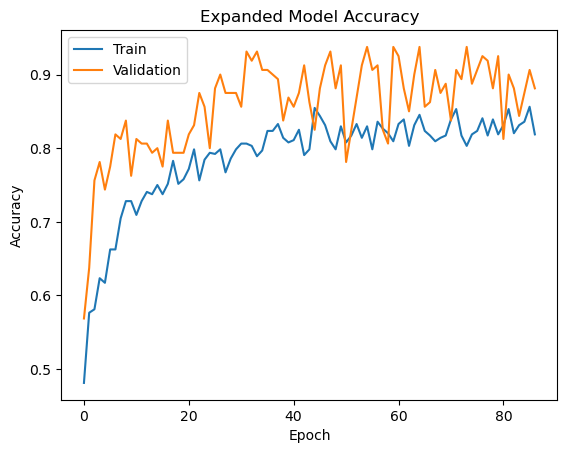

In [130]:
# Plot training & val accuracy values for the expanded model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Expanded Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc='upper left')
plt.show()

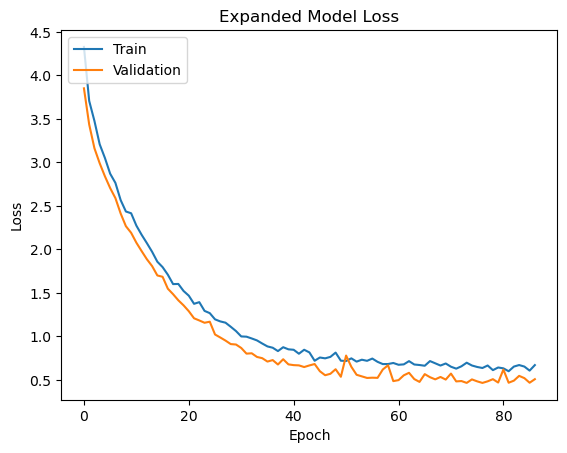

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Expanded Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()